In [151]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix




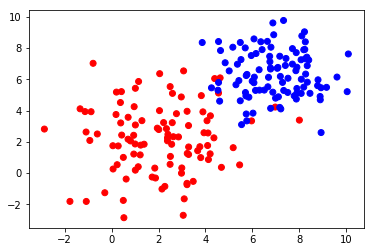

In [152]:
X1=2*np.random.randn(100,2)+np.array([2,2])
X2=1.5*np.random.randn(100,2)+np.array([7,6])
data=np.concatenate((X1,X2),axis=0).T
plt.show()
Y=np.concatenate((np.ones(100),(-1*np.ones(100)))).reshape((200,1))
c=[]
for item in Y:
    if item==1:
        c.append('red')
    else:
        c.append('blue')
plt.scatter(data[0,:],data[1,:],c=c)
plt.show()

In [153]:
X=data
m,n= X.shape
C=5
A1=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A1[i,j]=np.matmul(X[:,i].T,X[:,j])
A1=A1+(1/C)*np.identity(n)
for i in range(n):
    for j in range(n):
        A1[i,j]=Y[i]*Y[j]*A1[i,j]
Aineq=matrix(-1*np.identity(n))
bineq=matrix(np.zeros((n,1)))


In [154]:
f=-1*np.ones((n,1))
Aeq=matrix(Y.T,tc='d')
beq=matrix(np.array([[0]]),tc="d")
beq


<1x1 matrix, tc='d'>

In [155]:
from cvxopt import solvers
sol = solvers.qp(matrix(A1,tc='d'),matrix(f,tc='d'),Aineq,bineq,Aeq,beq)




     pcost       dcost       gap    pres   dres
 0: -3.5836e+01 -9.3974e+01  9e+02  3e+01  2e+00
 1: -6.7977e+01 -1.0488e+02  2e+02  6e+00  5e-01
 2: -5.2597e+01 -7.5219e+01  3e+01  2e-01  2e-02
 3: -5.6626e+01 -6.2977e+01  7e+00  5e-02  4e-03
 4: -5.9193e+01 -6.0726e+01  2e+00  8e-03  7e-04
 5: -6.0099e+01 -6.0254e+01  2e-01  2e-14  8e-13
 6: -6.0211e+01 -6.0216e+01  5e-03  2e-14  7e-13
 7: -6.0214e+01 -6.0215e+01  1e-04  2e-14  9e-13
 8: -6.0214e+01 -6.0214e+01  1e-06  3e-14  7e-13
Optimal solution found.


In [156]:
alpha=np.array(sol['x'])
w=np.zeros((1,2))
for i in range(n):
    w=w+alpha[i]*Y[i]*X[:,i]

w=w.T

In [171]:
xx=np.where(alpha.T[0]  )


for item in xx[0]:
    if Y[item]<0:
        x_mines=X[:,item]
    if Y[item]>0:
        x_plus=X[:,item]
b=(-0.5)*np.dot(w.T,(x_plus+x_mines))



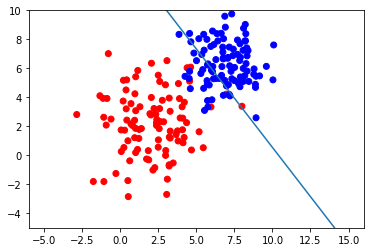

In [158]:
x1=np.linspace(-5,15,200)
x2=-(w[0]/w[1])*x1-b/(w[1])
plt.scatter(X[0,:],X[1,:],c=c)
plt.plot(x1,x2,)
plt.ylim([-5, 10])
plt.show()

In [161]:
alpha

array([[1.00813438e-09],
       [1.11416791e-09],
       [9.04077944e-10],
       [1.08257904e-09],
       [1.12754991e+00],
       [9.57256412e-10],
       [9.59552456e-10],
       [6.95234303e+00],
       [2.67458684e-09],
       [9.81679806e-10],
       [5.89284478e-10],
       [1.05068370e-09],
       [1.42505659e-09],
       [2.44590141e-09],
       [2.25940785e-09],
       [3.73315660e-09],
       [1.86585068e-09],
       [2.80193641e-09],
       [3.08644622e-09],
       [5.05521227e-08],
       [2.26105661e-09],
       [1.01876693e-09],
       [2.42871986e-09],
       [1.52923668e-09],
       [1.26736739e-09],
       [1.33238046e-09],
       [8.98013873e-10],
       [1.41343839e-09],
       [3.13545080e-09],
       [6.15005863e-10],
       [8.08674515e-10],
       [9.35926282e-10],
       [4.36880544e-09],
       [6.94332625e-01],
       [1.15581059e-01],
       [1.62848888e-09],
       [3.19866877e+00],
       [1.60309650e-09],
       [2.58190455e-09],
       [9.85760542e-10],


In [164]:
alpha[xx]

array([[ 1.12754991],
       [ 6.95234303],
       [ 0.69433262],
       [ 0.11558106],
       [ 3.19866877],
       [ 6.34545847],
       [ 0.62041391],
       [ 1.60210335],
       [ 4.13735295],
       [ 9.18920738],
       [ 1.04800069],
       [ 1.4989453 ],
       [ 5.16213255],
       [ 1.90686618],
       [ 5.38197635],
       [ 1.09663307],
       [10.13689766],
       [ 0.92100381],
       [ 0.26492527],
       [ 2.32284996],
       [ 0.94188662],
       [ 0.46751379],
       [ 5.99777877],
       [ 1.40710073],
       [ 0.40786008],
       [ 0.52190012],
       [ 0.24698113],
       [ 2.15116892],
       [ 3.5512781 ],
       [ 2.2413863 ],
       [ 3.69925036],
       [ 4.59239403],
       [ 1.5049853 ],
       [ 4.39394806],
       [ 1.39759877],
       [ 0.98026317],
       [ 4.96852745],
       [ 5.0860209 ],
       [ 2.47921655],
       [ 5.60588757],
       [ 3.64065595],
       [ 0.26745534]])

In [163]:
xx


(array([  4,   7,  33,  34,  36,  43,  46,  48,  49,  61,  62,  67,  79,
         81,  86,  91,  94, 100, 108, 110, 111, 114, 117, 118, 119, 121,
        125, 126, 132, 140, 145, 146, 152, 162, 165, 167, 183, 184, 187,
        188, 194, 197], dtype=int64),)